In [4]:
cd

/home/jupyter-vit_cse_bhargava


In [5]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

fatal: destination path 'yolov5' already exists and is not an empty directory.
/home/jupyter-vit_cse_bhargava/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [6]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu117 _CudaDeviceProperties(name='Quadro GV100', major=7, minor=0, total_memory=32499MB, multi_processor_count=80)


In [4]:
%cd /home/jupyter-vit_cse_bhargava/yolov5

/home/jupyter-vit_cse_bhargava/yolov5


In [5]:
cd 

/home/jupyter-vit_cse_bhargava


In [6]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/home/jupyter-vit_cse_bhargava/.kaggle’: File exists


In [8]:
!cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
import kaggle

In [11]:
!kaggle datasets download -d siddharthkumarsah/plastic-bottles-image-dataset

/bin/bash: kaggle: command not found


In [12]:
!pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import pandas
import opendatasets as od

In [14]:
od.download("https://www.kaggle.com/datasets/pandrii000/hituav-a-highaltitude-infrared-thermal-dataset")

100%|██████████| 191M/191M [00:04<00:00, 48.1MB/s] 


In [15]:
cd hituav-a-highaltitude-infrared-thermal-dataset

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset


In [16]:
cd hit-uav

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav


In [17]:
# define number of classes based on YAML
import yaml
with open('/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav' + "/dataset.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [18]:
%cat /home/jupyter-vit_cse_bhargava/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [19]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))
     

In [20]:
%%writetemplate /home/jupyter-vit_cse_bhargava/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [21]:
cd /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav


In [22]:
ls

dataset.yaml  images/  labels/


In [23]:
!mkdir train
!mkdir test
!mkdir valid

In [24]:
cd train

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/train


In [25]:
!mkdir images
!mkdir labels

In [26]:
cd /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/test

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/test


In [27]:
!mkdir images
!mkdir labels

In [28]:
cd /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid


In [29]:
!mkdir images
!mkdir labels

In [30]:
!mv /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/images/train/* /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/train/images/

In [31]:
!mv /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/labels/train/* /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/train/labels/

In [32]:
!mv /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/images/test/* /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/test/images/

In [33]:
!mv /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/labels/test/* /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/test/labels/

In [34]:
!mv /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/images/val/* /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid/images/

In [35]:
!mv /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/labels/val/* /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid/labels/

In [36]:
cd

/home/jupyter-vit_cse_bhargava


In [37]:
#rm -rf /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/

In [42]:
cd hituav-a-highaltitude-infrared-thermal-dataset

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset


In [44]:
cd hit-uav

/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav


In [46]:
# train yolov5s on custom data for 100 epochs
# time its performance
%time
%cd /home/jupyter-vit_cse_bhargava/yolov5/
!python train.py --img 416 --batch 32 --epochs 60 --data /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/dataset.yaml --cfg /home/jupyter-vit_cse_bhargava/yolov5/models/custom_yolov5s.yaml --weights '' --name yolov5s_re

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 18.1 µs
/home/jupyter-vit_cse_bhargava/yolov5
2023-03-18 11:23:39.484468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 11:23:40.569255: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jupyter-vit_cse_bhargava/.local/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-18 11:23:40.569362: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open s

In [1]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

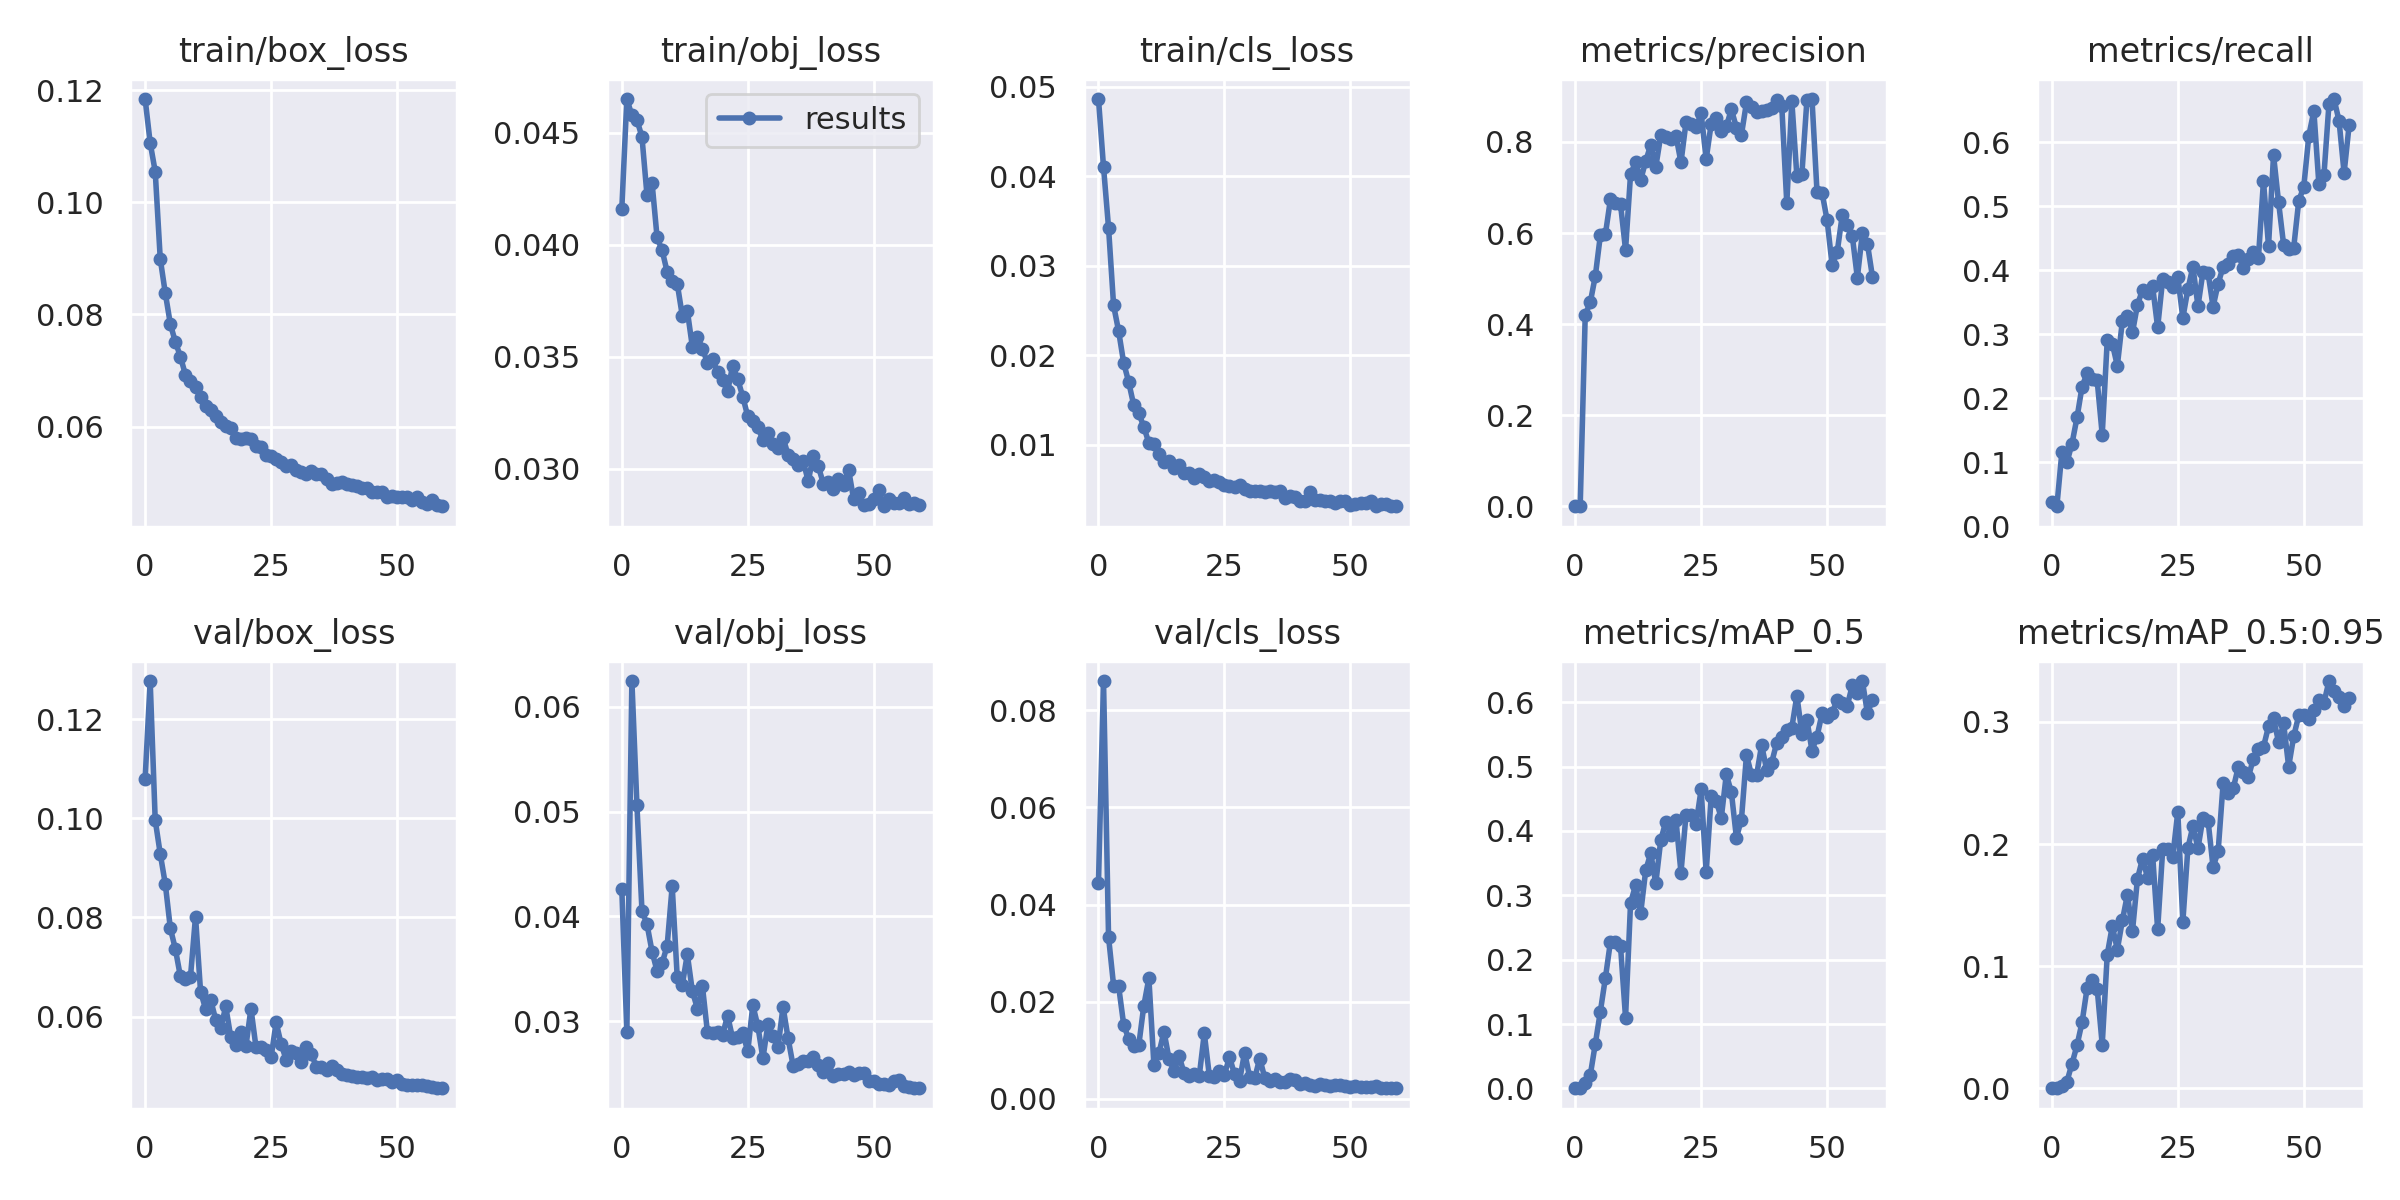

In [7]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/home/jupyter-vit_cse_bhargava/yolov5/runs/train/yolov5s_re3/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


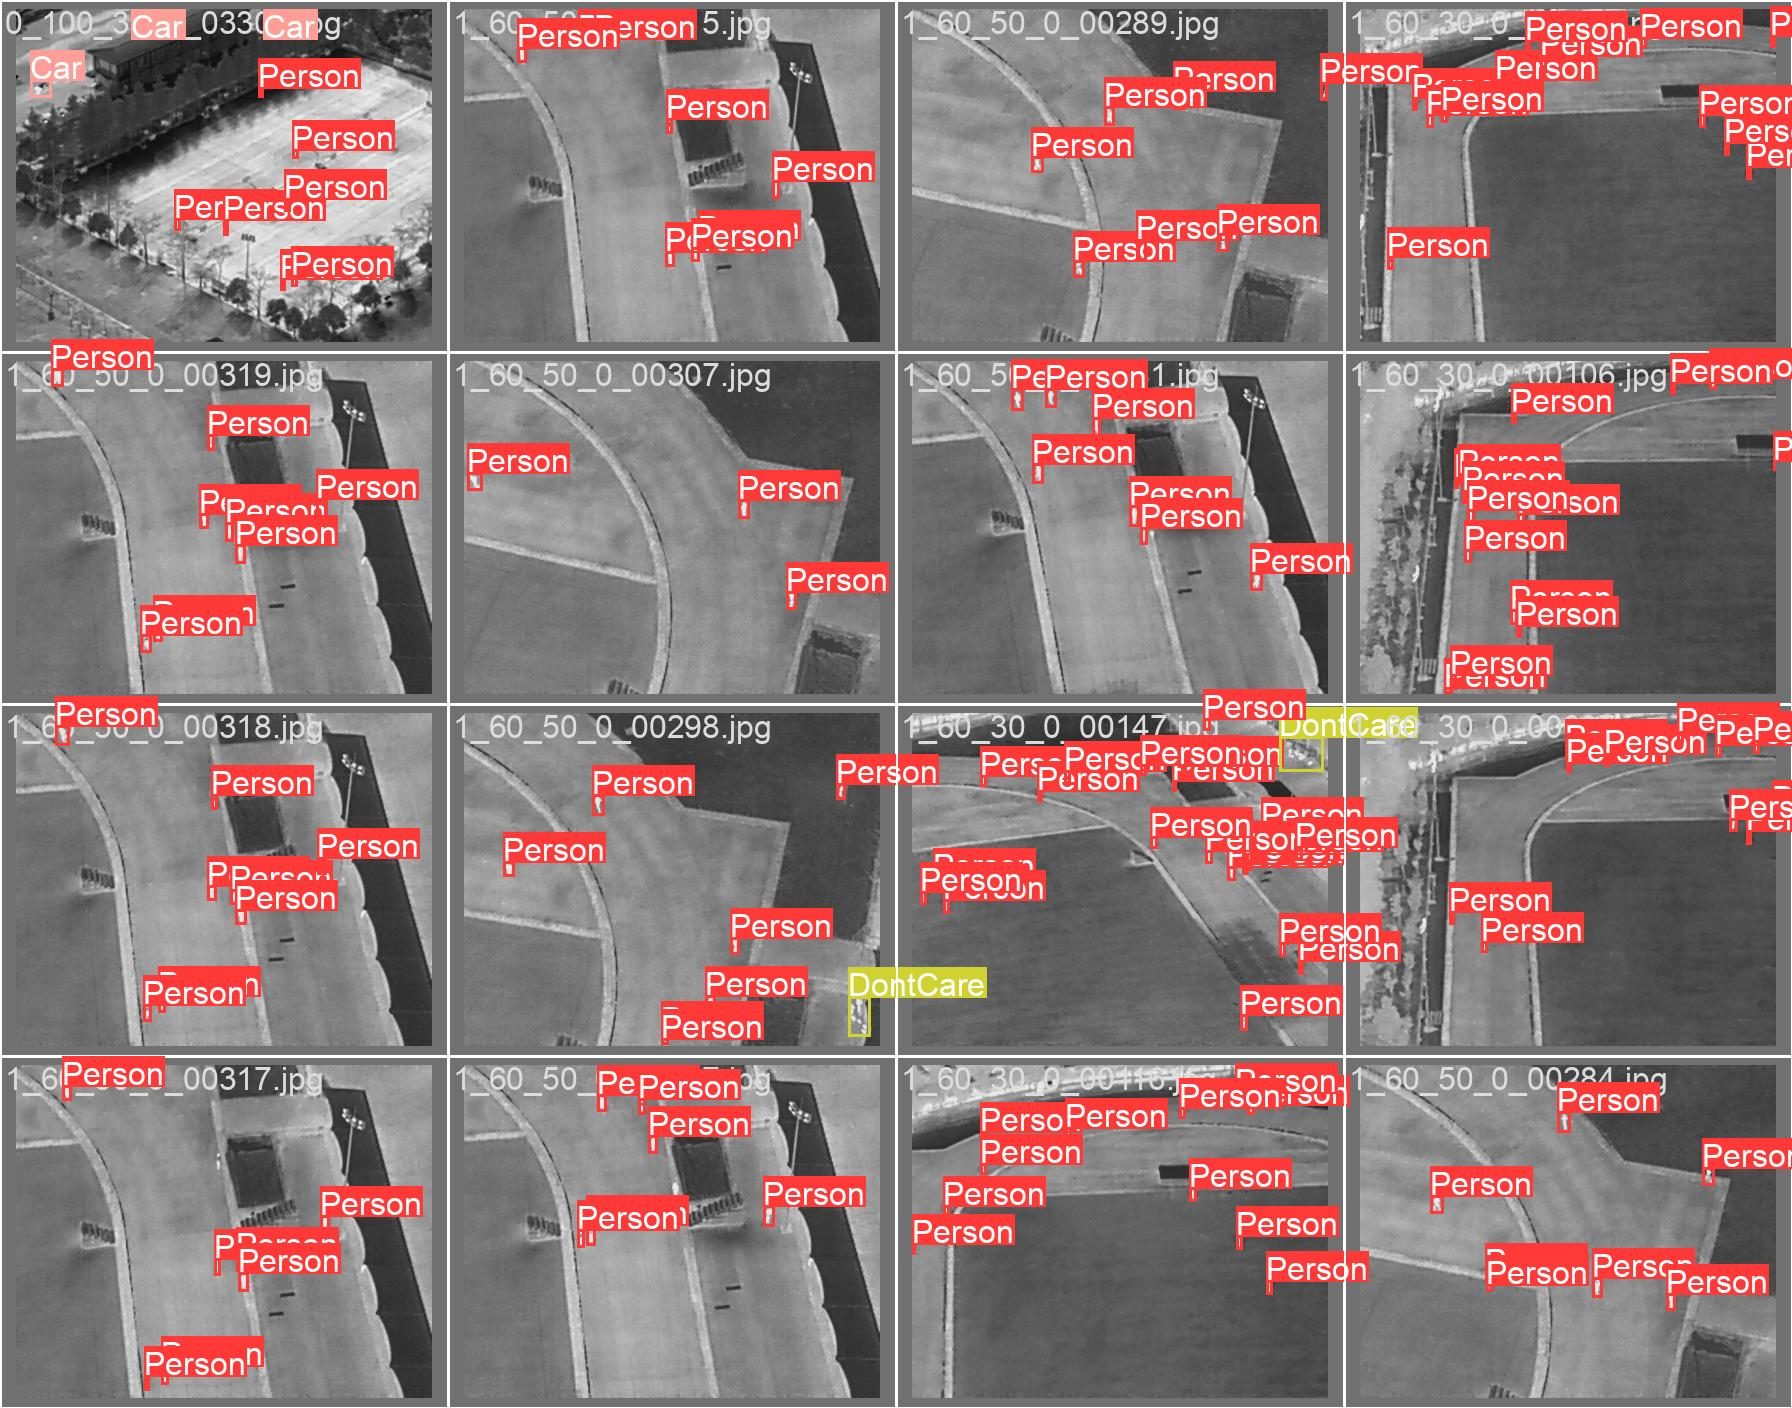

In [8]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/home/jupyter-vit_cse_bhargava/yolov5/runs/train/yolov5s_re3/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


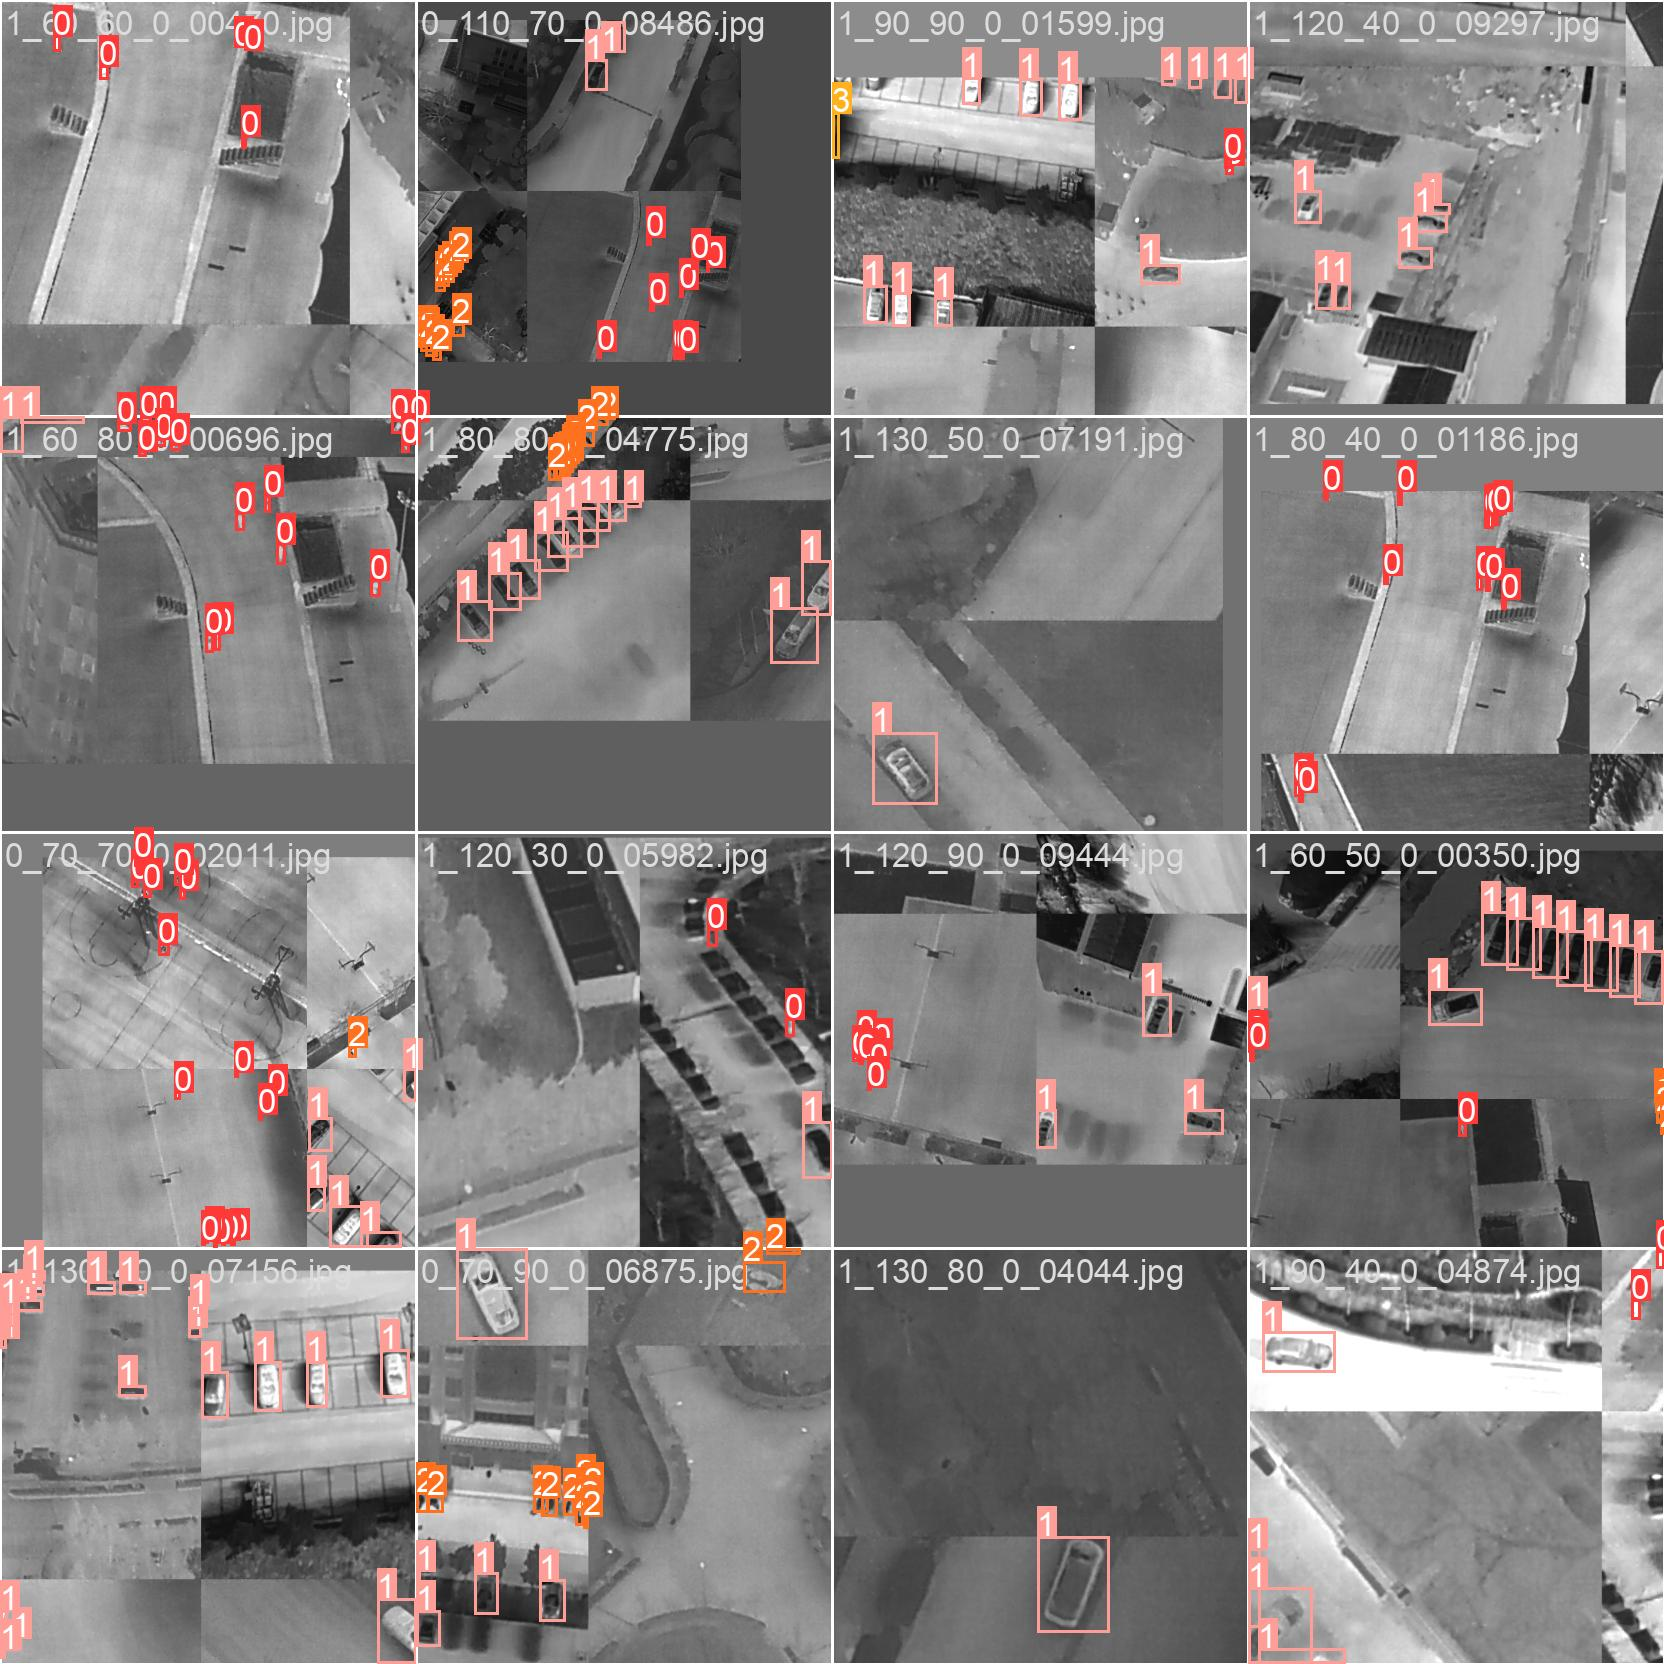

In [9]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/home/jupyter-vit_cse_bhargava/yolov5/runs/train/yolov5s_re3/train_batch0.jpg', width=900)

In [10]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [11]:
%ls runs/train/yolov5s_re3/weights

best.pt  last.pt


In [12]:
!python detect.py --weights runs/train/yolov5s_re3/weights/best.pt --img 416 --conf 0.4 --source /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid/images

detect: weights=['runs/train/yolov5s_re3/weights/best.pt'], source=/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.9.7 torch-2.0.0+cu117 CUDA:0 (Quadro GV100, 32500MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7257306 parameters, 0 gradients
image 1/287 /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/valid/images/0_100_30_0_03306.jpg: 352x416 4 Persons, 2 Cars, 39.1ms
image 2/287 /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-ua

In [17]:
cd /home/jupyter-vit_cse_bhargava/yolov5

/home/jupyter-vit_cse_bhargava/yolov5


In [21]:
cd yolov5

/home/jupyter-vit_cse_bhargava/yolov5


In [23]:
ls

benchmarks.py    detect.py   __pycache__/      segment/        val.py
CITATION.cff     export.py   README.md         setup.cfg
classify/        hubconf.py  README.zh-CN.md   train.py
CONTRIBUTING.md  LICENSE     requirements.txt  tutorial.ipynb
data/            models/     runs/             utils/


In [24]:
!python val.py --weights runs/train/yolov5s_re3/weights/best.pt --data /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/dataset.yaml --task test --name yolo_det


val: data=/home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/dataset.yaml, weights=['runs/train/yolov5s_re3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.9.7 torch-2.0.0+cu117 CUDA:0 (Quadro GV100, 32500MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7257306 parameters, 0 gradients
test: Scanning /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-the
test: New cache created: /home/jupyter-vit_cse_bhargava/hituav-a-highaltitude-infrared-thermal-dataset/hit-uav/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        571       4811      0.752       0.52       0.61   